## **Reproducible spatial analysis with ArcPy and R**

In this example I'm going to crop a large image with a polygon, run a majority filter and then compare frequency of cell values between the cropped image and the filtered image. 

### Let's start working with R

I found that cropping an image with R is **much simpler** than doing it with some other GIS software programs. Let's define the working directory and load the required package:

In [18]:
setwd("C:/Users/Public/Documents/amsantac/data")
library(raster)

Let's import the files into R:

In [19]:
img <- raster("c_2004-2005_30_classif_03_v3.tif")
shp <- shapefile("footprints_2000_v2.shp")
img         # let's print some info about the imported raster

class       : RasterLayer 
dimensions  : 16785, 24047, 403628895  (nrow, ncol, ncell)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -73.89029, -67.40976, 2.58095, 7.104416  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : C:\Users\Public\Documents\amsantac\data\c_2004-2005_30_classif_03_v3.tif 
names       : c_2004.2005_30_classif_03_v3 
values      : -2147483648, 2147483647  (min, max)


In [3]:
# Crop the image with the polygon shapefile
crop.img <- crop(img, shp)
crop.img    # compare the raster extent of the cropped image vs. the original image

class       : RasterLayer 
dimensions  : 6949, 7215, 50137035  (nrow, ncol, ncell)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -73.89029, -71.94589, 3.403178, 5.275895  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : C:\Users\Guest\AppData\Local\Temp\RtmpAjnXu1\raster\r_tmp_2016-06-24_190040_9556_09296.grd 
names       : c_2004.2005_30_classif_03_v3 
values      : 0, 8  (min, max)


*Plot the image:*

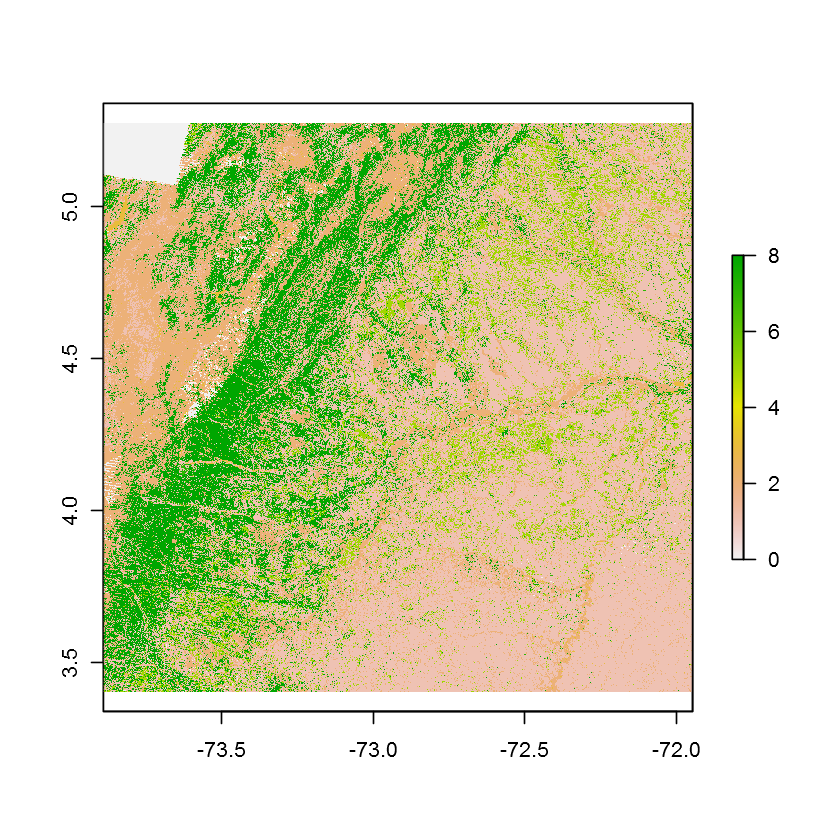

In [26]:
plot(crop.img)  # if needed, install the package called 'Cairo'

Take a look at the histogram:

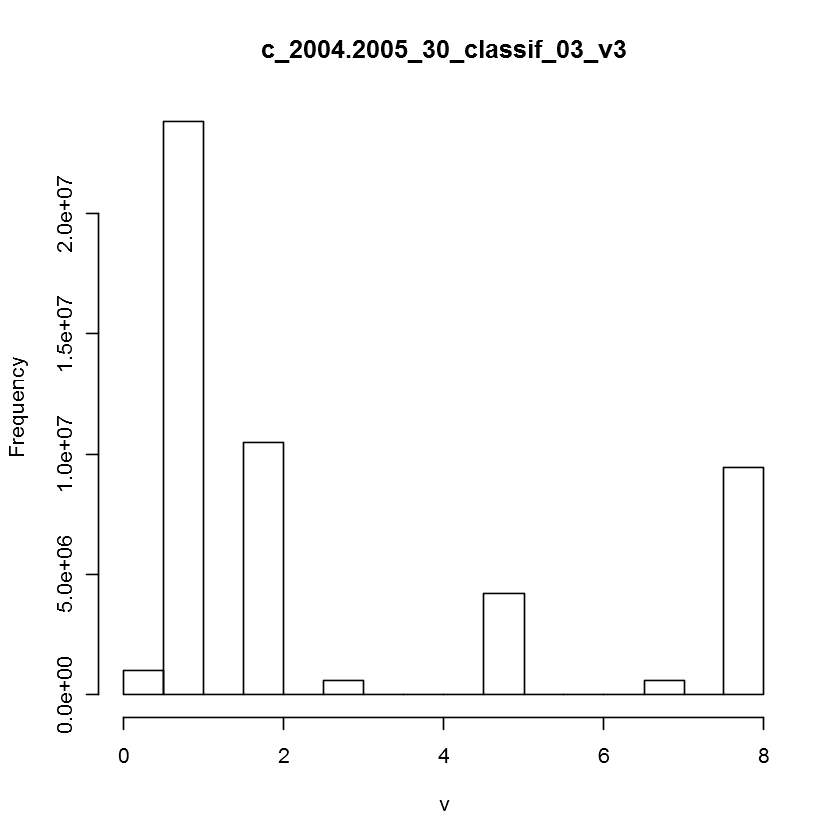

In [5]:
hist(crop.img, maxpixels = 50137035)

In [4]:
# Export the cropped raster:
writeRaster(crop.img, "cropimg.tif", datatype = 'INT1U')

## Now let's do some processing with ArcPy

Applying a majority filter was **much faster** with ArcGIS than with R. So let's see how to apply a filter to the raster created previously: 

In [1]:
# Import arcpy and define the workspace
import arcpy
arcpy.env.workspace="C:/Users/Public/Documents/amsantac/data"
from arcpy.sa import *

In [2]:
# List the raster files in the workspace 
rasters = arcpy.ListRasters("*", "ALL")
for raster in rasters:
    print(raster)

cropimg.tif
c_2004-2005_30_classif_03_v3.tif


In [3]:
# Set local variables
inRaster = "cropimg.tif"

# Execute MajorityFilter
outMajFilt = MajorityFilter(inRaster, "EIGHT", "HALF")

In [4]:
# Save the output 
outMajFilt.save("C:/Users/Public/Documents/amsantac/data/majfilter.tif")

In [5]:
# Verify the new raster file was created
rasters = arcpy.ListRasters("*", "ALL")
for raster in rasters:
    print(raster)

cropimg.tif
c_2004-2005_30_classif_03_v3.tif
majfilter.tif


## Let's go back to R

Finally I want to compare the histograms of the cropped and filtered images. When switching back to R, we are starting a new session, so we have to set the working directory and load the packages and data again:

In [1]:
setwd("C:/Users/Public/Documents/amsantac/data")
library(raster)

Loading required package: sp


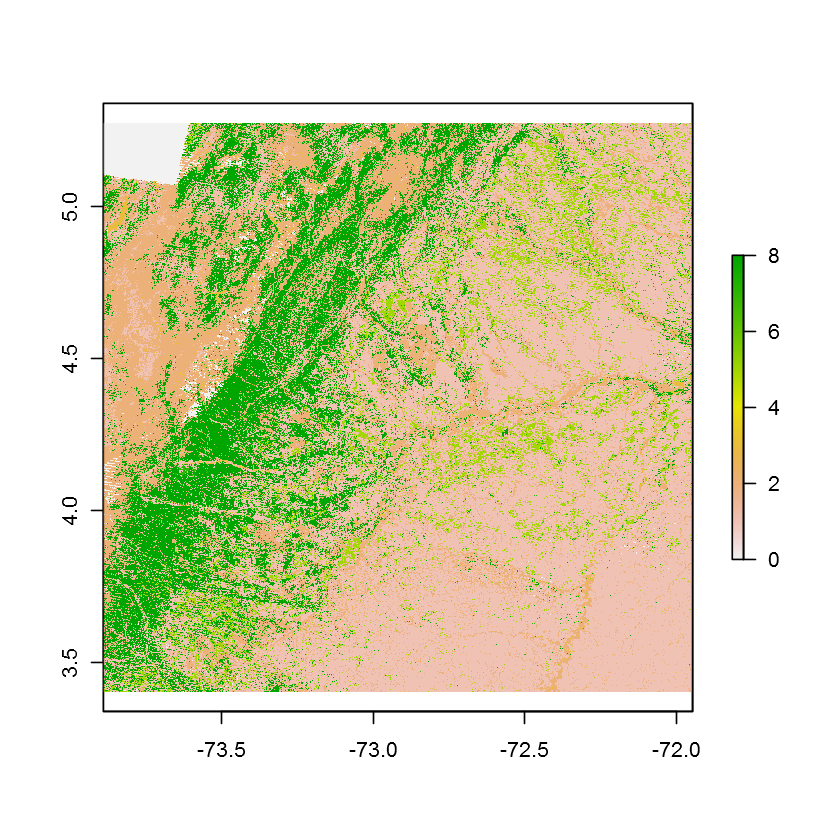

In [2]:
crop.img <- raster("cropimg.tif")
maj.img <- raster("majfilter.tif")
plot(maj.img)    # Plot the filtered image

Finally let's compare the cell values frequencies of the cropped and filtered rasters

In [15]:
mpix <- 50137035
data.frame(crop.img = hist(crop.img, breaks = 0:8, maxpixels = mpix, plot = FALSE)$counts, 
      maj.img = hist(maj.img, breaks = 0:8, maxpixels = mpix, plot = FALSE)$counts)

,crop.img,maj.img
1,24824072,25490027
2,10501382,10570031
3,577627,535510
4,0,0
5,4213162,3649504
6,0,0
7,574736,476731
8,9446056,9415232


Ok. We can see the magnitude of the difference.

### If you want to learn more about how to install and configure Jupyter Notebook to work with ArcPy and R as shown here, [check out the post in my blog](http://amsantac.co/blog/en/2016/06/27/reproducibility-arcpy-jupyter-notebook-r.html)